## Goldman Sachs ETF Poertfolio Optimization

In [18]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## Define Tickers and Time Range

Define the list of tickers

In [19]:
assets=['AAAU','GSLC','GSSC','GHYB']

In [20]:
# Assign weights to the etf
weights=np.array([0.25,0.25,0.25,0.25])

## Stock portfolio starting date

In [21]:
stockStartDate='2018-01-01'

## Set end date to today

In [22]:
today= datetime.today().strftime('%Y-%m-%d')
today

'2025-08-27'

In [23]:
# Create a data frame to store the adjusted close price  of teh stocks
df= pd.DataFrame()

#Store adjsuted close price of stock into df
for stock in assets:
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']

/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 

In [24]:
# Show the df
df

,AAAU,GSLC,GSSC,GHYB
Date,,,,
2018-08-15,11.740000,51.648548,43.639164,32.501751
2018-08-16,11.740000,52.047104,44.025494,32.501751
2018-08-17,11.820000,52.201084,44.194859,32.501751
2018-08-20,11.900000,52.382240,44.354153,32.611702
2018-08-21,11.930000,52.490944,44.812809,32.685463
...,...,...,...,...
2025-08-20,33.070000,125.230003,71.339996,45.224998
2025-08-21,32.959999,124.750000,71.510002,45.180000
2025-08-22,33.310001,126.680000,74.169998,45.490002


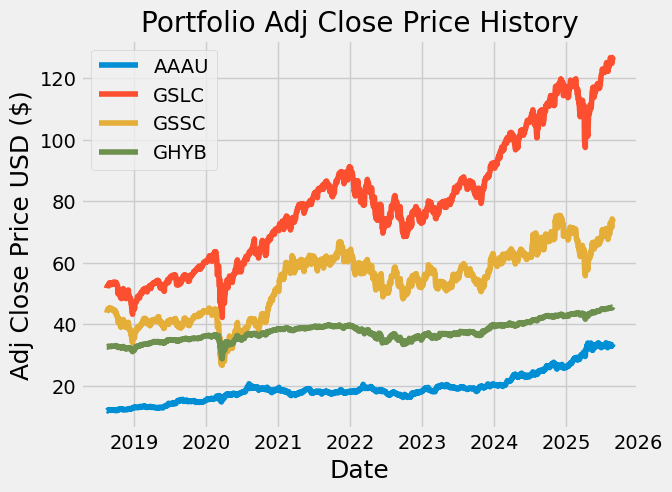

In [25]:
# Visually show the tock/portfolio
title='Portfolio Adj Close Price History'

# Get the stock
my_stocks=df

# Create and plot teh graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [26]:
# Show the daily simple returns
returns_df=df.pct_change()
returns_df

,AAAU,GSLC,GSSC,GHYB
Date,,,,
2018-08-15,NaN,NaN,NaN,NaN
2018-08-16,0.000000,0.007717,0.008853,0.000000
2018-08-17,0.006814,0.002958,0.003847,0.000000
2018-08-20,0.006768,0.003470,0.003604,0.003383
2018-08-21,0.002521,0.002075,0.010341,0.002262
...,...,...,...,...
2025-08-20,0.010079,-0.002072,-0.003492,-0.000685
2025-08-21,-0.003326,-0.003833,0.002383,-0.000995
2025-08-22,0.010619,0.015471,0.037198,0.006861


In [27]:
#   Create ad show the annualized covariancce matrix
cov_matrix_annual=returns_df.cov()*252
cov_matrix_annual

,AAAU,GSLC,GSSC,GHYB
AAAU,0.022776,0.003196,0.002663,0.002539
GSLC,0.003196,0.039470,0.040267,0.013812
GSSC,0.002663,0.040267,0.061125,0.015215
GHYB,0.002539,0.013812,0.015215,0.008177


In [28]:
# Calculate the portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

np.float64(0.017933385483126896)

In [29]:
# Calculate portfolio vlatility (standard deviation)
port_volatility=np.sqrt(port_variance)
port_volatility

np.float64(0.13391559088891367)

In [30]:
# Calculate annual portfolio return
portfolioSimpleAnnualReturn=np.sum(returns_df.mean()*weights)*252
portfolioSimpleAnnualReturn


np.float64(0.11687707685814548)

In [31]:
# show the expected annual return, volatility and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility/standard deviation: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 12.0%
Annual volatility/standard deviation: 13.0%
Annual variance: 2.0%


In [32]:
pip install PyportfolioOpt

In [33]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [34]:
# Portfolio optimization

# Calulate expected returns and annualized simple covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict({'AAAU': 0.69554, 'GSLC': 0.30446, 'GSSC': 0.0, 'GHYB': 0.0})
Expected annual return: 15.4%
Annual volatility: 12.7%
Sharpe Ratio: 1.21


(np.float64(0.15373004348245012),
 np.float64(0.1266142855004165),
 np.float64(1.2141603364491158))